In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health/Student Mental health.csv


## **Importing the libraries**

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

## **Importing the dataset**

In [303]:
df = pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")
df.head(2)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No


## **Data preprocessing**

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

**Filling a single null value in the Age variable with the mean age.**

In [305]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           101 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

**Adding new usefull variables and removing the timestamp**

In [306]:
df.drop("Timestamp", axis=1, inplace=True)
df["Suffering"] = None # Soon we will want to know if each observation presents at least one symptom of mental health conditions 
df["Cant"] = 1
df.head(2)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Suffering,Cant
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,None,1
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,None,1


**Encoding some categorical variables**

In [307]:
df["Do you have Depression?"] = df["Do you have Depression?"].apply(lambda x: 1 if x == "Yes" else 0)
df["Do you have Anxiety?"] = df["Do you have Anxiety?"].apply(lambda x: 1 if x == "Yes" else 0)
df["Do you have Panic attack?"] = df["Do you have Panic attack?"].apply(lambda x: 1 if x == "Yes" else 0)
df.head(2)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Suffering,Cant
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,1,0,1,No,None,1
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,0,1,0,No,None,1


**Normalizing the variable "Your current year of study"**

In [308]:
df["Your current year of Study"] = df["Your current year of Study"].map({
    "year 1": "1st year",
    "Year 1": "1st year",
    "year 2": "2nd year",
    "Year 2": "2nd year",
    "year 3": "3rd year",
    "Year 3": "3rd year",
    "year 4": "4th year",
    "Year 4": "4th year"
})
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Suffering,Cant
0,Female,18.0,Engineering,1st year,3.00 - 3.49,No,1,0,1,No,None,1
1,Male,21.0,Islamic education,2nd year,3.00 - 3.49,No,0,1,0,No,None,1
2,Male,19.0,BIT,1st year,3.00 - 3.49,No,1,1,1,No,None,1
3,Female,22.0,Laws,3rd year,3.00 - 3.49,Yes,1,0,0,No,None,1
4,Male,23.0,Mathemathics,4th year,3.00 - 3.49,No,0,0,0,No,None,1


**Filling the new Suffering variable with data**

In [309]:
df["Suffering"] = (df.filter(like="Do you have",axis=1)==1).any(1)
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Suffering,Cant
0,Female,18.0,Engineering,1st year,3.00 - 3.49,No,1,0,1,No,True,1
1,Male,21.0,Islamic education,2nd year,3.00 - 3.49,No,0,1,0,No,True,1
2,Male,19.0,BIT,1st year,3.00 - 3.49,No,1,1,1,No,True,1
3,Female,22.0,Laws,3rd year,3.00 - 3.49,Yes,1,0,0,No,True,1
4,Male,23.0,Mathemathics,4th year,3.00 - 3.49,No,0,0,0,No,False,1


In [310]:
df["Suffering"] = ["Yes" if x == True else "No" for x in df["Suffering"]]
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Suffering,Cant
0,Female,18.0,Engineering,1st year,3.00 - 3.49,No,1,0,1,No,Yes,1
1,Male,21.0,Islamic education,2nd year,3.00 - 3.49,No,0,1,0,No,Yes,1
2,Male,19.0,BIT,1st year,3.00 - 3.49,No,1,1,1,No,Yes,1
3,Female,22.0,Laws,3rd year,3.00 - 3.49,Yes,1,0,0,No,Yes,1
4,Male,23.0,Mathemathics,4th year,3.00 - 3.49,No,0,0,0,No,No,1


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Choose your gender                            101 non-null    object 
 1   Age                                           101 non-null    float64
 2   What is your course?                          101 non-null    object 
 3   Your current year of Study                    101 non-null    object 
 4   What is your CGPA?                            101 non-null    object 
 5   Marital status                                101 non-null    object 
 6   Do you have Depression?                       101 non-null    int64  
 7   Do you have Anxiety?                          101 non-null    int64  
 8   Do you have Panic attack?                     101 non-null    int64  
 9   Did you seek any specialist for a treatment?  101 non-null    obj

## **Exploratory data analysis**

**Age distribution of the sample.**

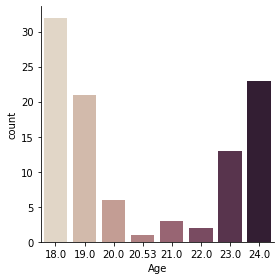

In [312]:
sns.catplot(x="Age", kind="count", palette="ch:.25", data=df, height = 4)

**Gender distribution.**

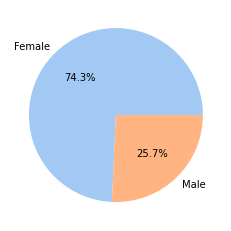

In [313]:
gender = df.groupby("Choose your gender")["Cant"].count()
colors = sns.color_palette("pastel")
plt.pie(gender,labels= gender.index, colors = colors, autopct="%0.1f%%")
plt.show()
# The majority of people who responded to the survey are women.

In [314]:
a = df[(df.Suffering == "Yes")]
a

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Suffering,Cant
0,Female,18.0,Engineering,1st year,3.00 - 3.49,No,1,0,1,No,Yes,1
1,Male,21.0,Islamic education,2nd year,3.00 - 3.49,No,0,1,0,No,Yes,1
2,Male,19.0,BIT,1st year,3.00 - 3.49,No,1,1,1,No,Yes,1
3,Female,22.0,Laws,3rd year,3.00 - 3.49,Yes,1,0,0,No,Yes,1
5,Male,19.0,Engineering,2nd year,3.50 - 4.00,No,0,0,1,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Female,18.0,BENL,1st year,3.00 - 3.49,No,1,0,0,No,Yes,1
94,Female,24.0,Fiqh,3rd year,0 - 1.99,No,0,0,1,No,Yes,1
96,Female,21.0,BCS,1st year,3.50 - 4.00,No,0,1,0,No,Yes,1
97,Male,18.0,Engineering,2nd year,3.00 - 3.49,No,1,1,0,No,Yes,1


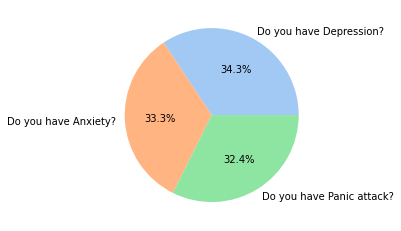

In [315]:
colors = sns.color_palette("pastel")
b = (df.filter(like="Do you have",axis=1)==1).sum()
total = df["Cant"].sum()
suffering = b/ total
plt.pie(suffering, labels = b.index, colors=colors, autopct = "%1.1f%%")
plt.show()
# Among people suffering from mental conditions, 
# there is a higher incidence of depression and 
# a lower incidence of panic attacks.


**Exploring the relation between Marital Status and mental conditions**

In [316]:
marital_suffering = df.pivot_table(index=["Suffering"], columns = ["Marital status"], aggfunc={"Cant":sum})
marital_suffering
# We noticed that married people suffer from less mental conditions than people who are single. 

Cant      
Marital status    No   Yes
Suffering                 
No              37.0   NaN
Yes             48.0  16.0

**Exploring gender and course year distribution related to mental conditions.**

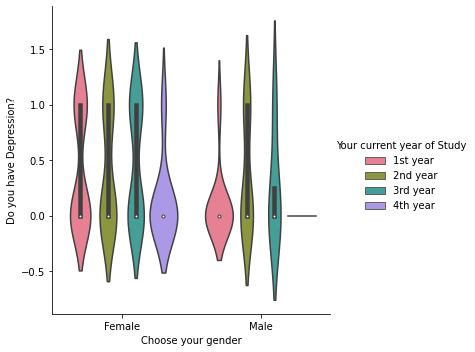

In [317]:
sns.catplot(x="Choose your gender", y="Do you have Depression?", hue= "Your current year of Study",
            kind="violin", data=df, palette = 'husl')

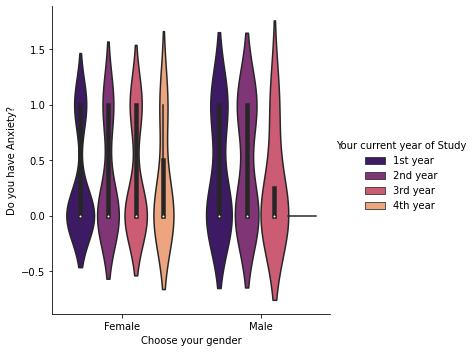

In [318]:
sns.catplot(x="Choose your gender", y="Do you have Anxiety?", hue= "Your current year of Study",
            kind="violin", data=df, palette = 'magma')

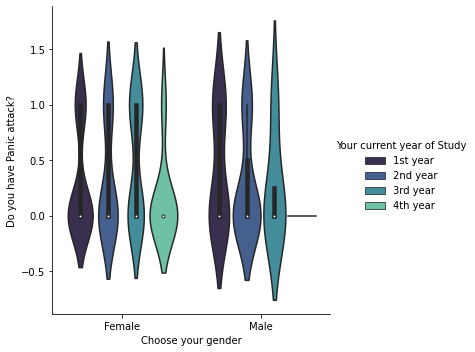

In [319]:
sns.catplot(x="Choose your gender", y="Do you have Panic attack?", hue= "Your current year of Study",
            kind="violin", data=df, palette = 'mako')

**Exploring the relation between GCPA and mental conditions.**

In [320]:
CGPA_suffering = df.pivot_table(index=["Suffering"], columns = ["What is your CGPA?"], aggfunc={"Cant":sum})
CGPA_suffering
# It is verified that the respondents with the best academic averages 
# are those who present more mental conditions.

Cant                                                  \
What is your CGPA? 0 - 1.99 2.00 - 2.49 2.50 - 2.99 3.00 - 3.49 3.50 - 4.00   
Suffering                                                                     
No                      3.0         1.0         1.0        15.0        17.0   
Yes                     1.0         1.0         3.0        28.0        30.0   

                                 
What is your CGPA? 3.50 - 4.00   
Suffering                        
No                          NaN  
Yes                         1.0

**Exploring the courses that present the greatest number of people with mental illnesses.**

In [321]:
course_suffering = df[df.Suffering == "Yes"].pivot_table(index="What is your course?", values="Cant", aggfunc=sum).sort_values("Cant", ascending=False).iloc[0:10:1]
course_suffering

,Cant
What is your course?,
Engineering,11
BCS,11
BIT,9
KOE,3
Laws,2
psychology,2
BENL,2
Usuluddin,1
TAASL,1


**Exploring which year of study has the highest incidence of mental conditions.**

In [322]:
year_suffering = df[df.Suffering == "Yes"].pivot_table(index = ["Your current year of Study"], aggfunc={"Cant":sum})
year_suffering
# Students at the beggining of their careers suffer more than students completing their courses.

,Cant
Your current year of Study,
1st year,25
2nd year,19
3rd year,18
4th year,2


**What suffering is more present in females?**

In [323]:
female_depression = df[(df.Suffering == "Yes") & (df["Choose your gender"] == "Female") & (df["Do you have Depression?"]== 1)].pivot_table(index = ["Do you have Depression?"],aggfunc={"Cant":sum})
female_anxiety = df[(df.Suffering == "Yes") & (df["Choose your gender"] == "Female") & (df["Do you have Anxiety?"]== 1)].pivot_table(index = ["Do you have Anxiety?"],aggfunc={"Cant":sum})
female_PAttack = df[(df.Suffering == "Yes") & (df["Choose your gender"] == "Female")& (df["Do you have Panic attack?"]== 1)].pivot_table(index = ["Do you have Panic attack?"],aggfunc={"Cant":sum})
print(female_depression, female_anxiety, female_PAttack)

                         Cant
Do you have Depression?      
1                          29                       Cant
Do you have Anxiety?      
1                       24                            Cant
Do you have Panic attack?      
1                            25


**What suffering is more present in males?**

In [324]:
male_depression = df[(df.Suffering == "Yes") & (df["Choose your gender"] == "Male") & (df["Do you have Depression?"]== 1)].pivot_table(index = ["Do you have Depression?"],aggfunc={"Cant":sum})
male_anxiety = df[(df.Suffering == "Yes") & (df["Choose your gender"] == "Male") & (df["Do you have Anxiety?"]== 1)].pivot_table(index = ["Do you have Anxiety?"],aggfunc={"Cant":sum})
male_PAttack = df[(df.Suffering == "Yes") & (df["Choose your gender"] == "Male")& (df["Do you have Panic attack?"]== 1)].pivot_table(index = ["Do you have Panic attack?"],aggfunc={"Cant":sum})
print(male_depression, male_anxiety, male_PAttack)

                         Cant
Do you have Depression?      
1                           6                       Cant
Do you have Anxiety?      
1                       10                            Cant
Do you have Panic attack?      
1                             8


## Creating a second dataframe to apply Logistic Regression.

In [325]:
df["Suffering"] = [1 if x == "Yes" else 0 for x in df["Suffering"]]
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Suffering,Cant
0,Female,18.0,Engineering,1st year,3.00 - 3.49,No,1,0,1,No,1,1
1,Male,21.0,Islamic education,2nd year,3.00 - 3.49,No,0,1,0,No,1,1
2,Male,19.0,BIT,1st year,3.00 - 3.49,No,1,1,1,No,1,1
3,Female,22.0,Laws,3rd year,3.00 - 3.49,Yes,1,0,0,No,1,1
4,Male,23.0,Mathemathics,4th year,3.00 - 3.49,No,0,0,0,No,0,1


In [326]:
df2 = df
df2.head(2)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Suffering,Cant
0,Female,18.0,Engineering,1st year,3.00 - 3.49,No,1,0,1,No,1,1
1,Male,21.0,Islamic education,2nd year,3.00 - 3.49,No,0,1,0,No,1,1


In [327]:
df2.drop("Did you seek any specialist for a treatment?", inplace=True, axis=1)
df2.drop("Cant", inplace=True, axis=1)
df2.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Suffering
0,Female,18.0,Engineering,1st year,3.00 - 3.49,No,1,0,1,1
1,Male,21.0,Islamic education,2nd year,3.00 - 3.49,No,0,1,0,1
2,Male,19.0,BIT,1st year,3.00 - 3.49,No,1,1,1,1
3,Female,22.0,Laws,3rd year,3.00 - 3.49,Yes,1,0,0,1
4,Male,23.0,Mathemathics,4th year,3.00 - 3.49,No,0,0,0,0


**Renaming columns.**

In [328]:
df2.rename(columns={"Choose your gender": "Gender", "Your current year of Study":"Year", 
                   "What is your course?":"Course", 
                   "What is your CGPA?":"GCPA", 
                    "Marital status":"Married",
                   "Do you have Depression?":"Depression", 
                   "Do you have Anxiety?":"Anxiety", 
                   "Do you have Panic attack?":"Panicattack"}, inplace=True)

df2.head()

,Gender,Age,Course,Year,GCPA,Married,Depression,Anxiety,Panicattack,Suffering
0,Female,18.0,Engineering,1st year,3.00 - 3.49,No,1,0,1,1
1,Male,21.0,Islamic education,2nd year,3.00 - 3.49,No,0,1,0,1
2,Male,19.0,BIT,1st year,3.00 - 3.49,No,1,1,1,1
3,Female,22.0,Laws,3rd year,3.00 - 3.49,Yes,1,0,0,1
4,Male,23.0,Mathemathics,4th year,3.00 - 3.49,No,0,0,0,0


**Exploring correlations between Suffering and other variables.**

In [329]:
df2.corr()["Suffering"].sort_values()

Age           -0.049224
Panicattack    0.529680
Anxiety        0.541643
Depression     0.553698
Suffering      1.000000
Name: Suffering, dtype: float64

<AxesSubplot:>

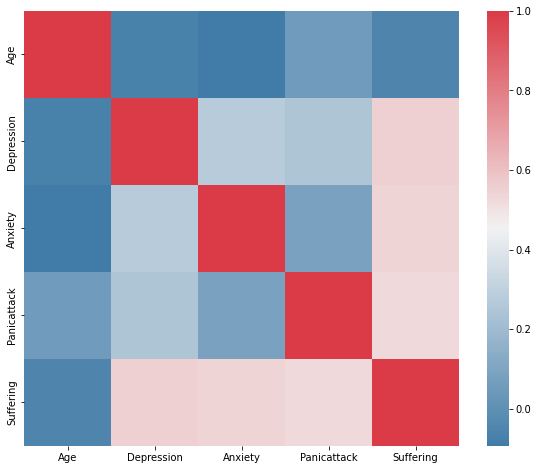

In [330]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype="bool"), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [331]:
df2.drop("Age", axis=1, inplace=True)
df2.drop("Panicattack", axis=1, inplace=True)
df2.drop("Year",  axis=1, inplace=True)
df2.drop("Course",  axis=1, inplace=True)
df2.drop("Gender",  axis=1, inplace=True)
df2.drop("GCPA",  axis=1, inplace=True)
df2.drop("Married",  axis=1, inplace=True)
df2.head(2)

,Depression,Anxiety,Suffering
0,1,0,1
1,0,1,1


**Encoding categorical variables.**

In [332]:
x = df2.iloc[:,:-1].values
y = df2.iloc[:, -1].values
print(x)

[[1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]]


In [333]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [334]:
print(X_train)

[[0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]


In [335]:
print(y_train)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0
 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 1 0 0 1]


In [336]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [337]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]]


In [338]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0]
 [ 1  9]]


0.9523809523809523